----
# Data EDA
----

## Set Up
----

In [1]:
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

## Data Loading
----

In [2]:
msft_df = pd.read_csv('../../data/microsoft_data_cleaned.csv', index_col='Date')

## Checking datatypes
---

In [3]:
msft_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 2019-07-29 to 2024-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9+ KB


### Reset Date to be datetime type

In [4]:
msft_df.index = pd.to_datetime(msft_df.index)

In [5]:
msft_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2019-07-29 to 2024-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


## Exploring Seasonality using Adjusted Close Value
---

### Daily Plot

In [6]:
msft_df['Adj Close'].mean()

265.48934761477364

In [7]:
from pandas.tseries.offsets import CustomBusinessDay
import holidays

us_bank_hols = holidays.UnitedStates(years=[2019,2020,2021,2022,2023,2024])

# Define Good Friday dates (for 2019 to 2024)
good_fridays = pd.to_datetime([
    '2019-04-19',  # Good Friday 2019
    '2020-04-10',  # Good Friday 2020
    '2021-04-02',  # Good Friday 2021
    '2022-04-15',  # Good Friday 2022
    '2023-04-07',  # Good Friday 2023
    '2024-03-29',  # Good Friday 2024
])

all_holidays = pd.to_datetime(list(us_bank_hols) + list(good_fridays))
cust_business_days = CustomBusinessDay(holidays=all_holidays)


In [8]:
daily_msft_df = msft_df[['Adj Close']].resample(cust_business_days).mean()

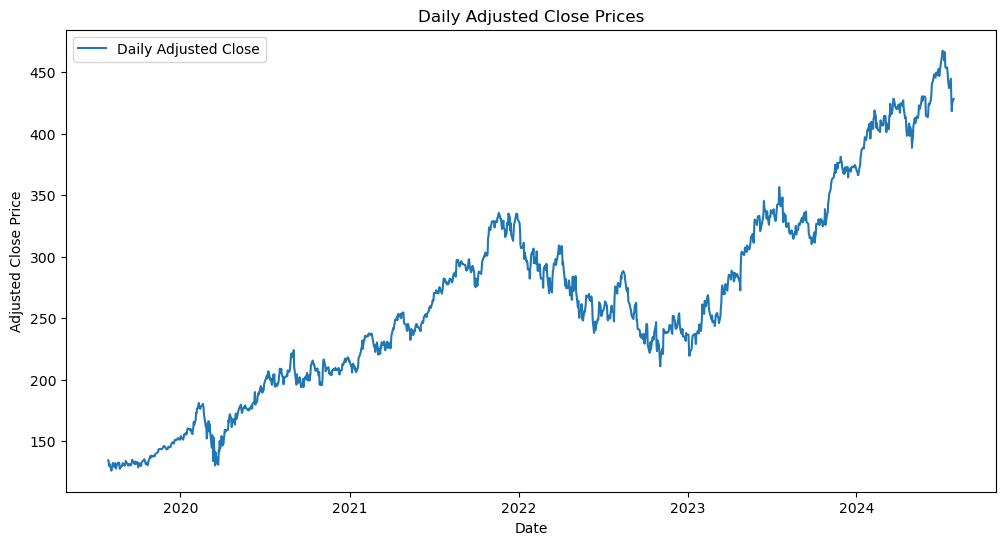

In [9]:

plt.figure(figsize=(12, 6))
plt.plot(daily_msft_df.index, daily_msft_df['Adj Close'], label='Daily Adjusted Close')
plt.title('Daily Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

**Plot Description:**

Overall, Microsoft's stock price shows a clear upward trend over the 5-year period, reflecting positive company growth.

A notable dip is observed between 2022 and 2023, which may be due to the economic impact of the Russia-Ukraine war. This event contributed to market instability and inflation, both of which plaued a role in the decline in tech stocks which fell by more than 30% in 2022 [1]. The increased volatility during this period also shows market's reaction to these disruptive factors.

From 2023, Microsoft’s stock shows signs of recovery, likely due to a stabilsation in market conditions leading to greater investor confidence. This upward trend could also be driven by the release of new products/updates.

[1] https://www.forbes.com/sites/qai/2023/01/19/why-were-tech-stocks-down-in-2022-and-how-long-will-the-slump-last/#:~:text=Key%20takeaways%3A,inflation%20and%20uncertain%20economic%20conditions.


### Weekly Plot

In [10]:
# Aggregate to weekly frequency
weekly_msft_df = msft_df[['Adj Close']].resample('W').mean()

In [11]:
weekly_msft_df

,Adj Close
Date,
2019-08-04,132.107831
2019-08-11,129.469920
2019-08-18,129.611943
2019-08-25,131.211960
2019-09-01,130.656970
...,...
2024-07-07,461.084999
2024-07-14,460.056000
2024-07-21,444.895990


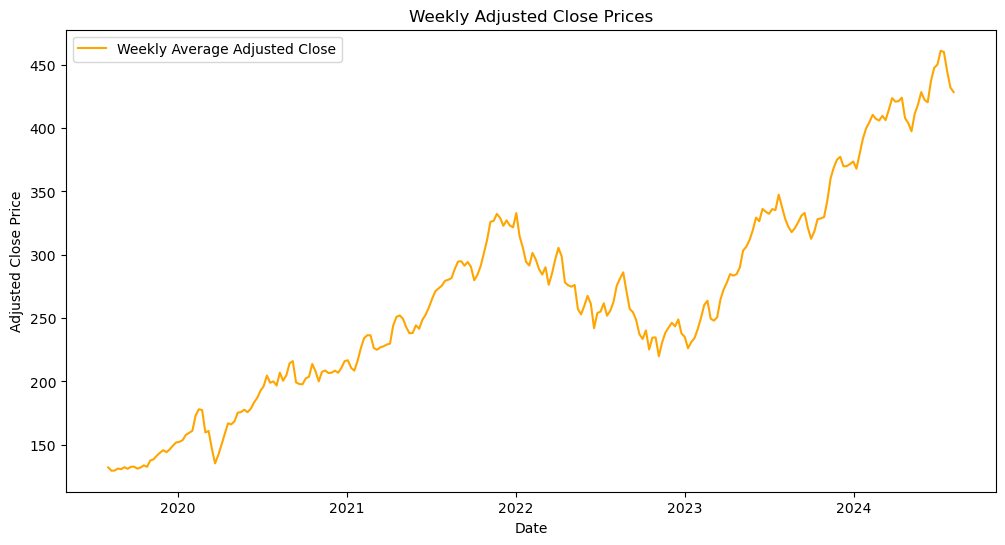

In [12]:
# Plotting weekly data
plt.figure(figsize=(12, 6))
plt.plot(weekly_msft_df.index, weekly_msft_df['Adj Close'], label='Weekly Average Adjusted Close', color='orange')
plt.title('Weekly Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

**Plot Description:**

The weekly plot of adjusted close prices closely follows the daily plot. Underlying trends and patterns identified are similar for both daily and weekly timeframes.

The weekly aggregation using resampling smooths out the fluctatuations we see in the daily plot. This makes the overall trends clearer and easier to follow.

### Monthly Plot

In [13]:
monthly_msft_df = msft_df[['Adj Close']].resample('MS').mean()

In [14]:
monthly_msft_df

,Adj Close
Date,
2019-07-01,132.770340
2019-08-01,130.317368
2019-09-01,132.158781
2019-10-01,133.224382
2019-11-01,141.880220
...,...
2024-03-01,416.039078
2024-04-01,412.519562
2024-05-01,417.202986


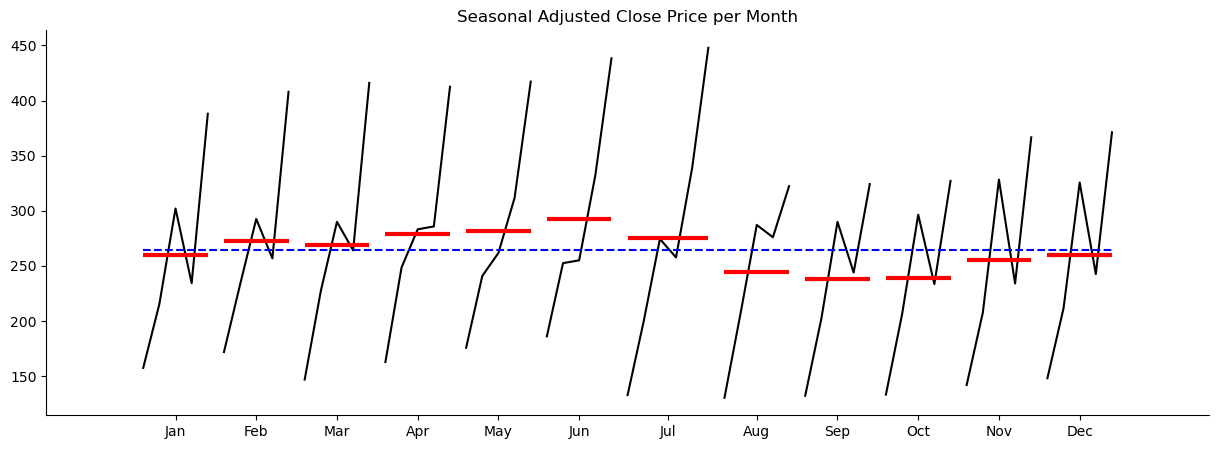

In [15]:
from statsmodels.graphics.tsaplots import month_plot

plt.figure(figsize=(15, 5))

# create the seasonal plot
month_plot(monthly_msft_df["Adj Close"], ax=plt.gca())

# adding a horizontal line for the mean
plt.hlines(y=monthly_msft_df.mean(),  xmin=0, xmax=60, color='blue', linestyles='--')

plt.title("Seasonal Adjusted Close Price per Month")
sns.despine()
plt.show()

**Plot Description:**

The plot above explores the seasonality of the stock close prices over the 5 year period. 

**Key insights:**

- April to July show higher than average close prices with a peak June
    - Steady increase from April to June in avergae adjusted close prices, this suggests stronger market performance for Microsoft in the spring to summer months.
    - To investigate if there any release or events where new products are unveiled, both could be reasons which drive the stock price up.

- August to December show lower than average close prices
    - Investors could be choosing to sell their stocks during this time after their gain
    - See if there is a simialar trend in tech stocks as a whole as this would influence Microsofts stock prices.

- Decemeber to January show recovery 
    - A slight upward trend from November to January
    - Could be due to Christmas, there is a tendency for stock prices to rise in the final week of Decemeber and the first few days of January.
    - Greater optimism at the start of the year as end of the year financial reports tend to include future steps which could attract investors/drive stocks up.

#### Exploring Deviations from the Mean

In [16]:
# monthly average
monthly_mean = monthly_msft_df.groupby(monthly_msft_df.index.month_name()).mean()

# relative deviation from the overall mean
monthly_mean_diff = (monthly_mean - monthly_mean.mean())/monthly_mean

# month names in right order- forcing start to be January
month_names = pd.date_range(start='2019-01', freq='M', periods=12).month_name()

# reorder columns to follow the month order
monthly_mean_diff = monthly_mean_diff.loc[month_names]

monthly_mean_diff

,Adj Close
January,-0.017039
February,0.031399
March,0.018472
April,0.052675
May,0.062410
June,0.098739
July,0.041432
August,-0.078871
September,-0.106580
October,-0.102968


In [17]:
fig = px.bar(monthly_mean_diff)

fig.update_layout(
    yaxis_title="", 
    yaxis_tickformat = '%',
    xaxis_title="",
    title="Monthly deviation from Mean(%)",
    showlegend=False,
)
fig.show()

**Plot Description:**

**June: Highest Positive Deviation:**

- June shows the highest positive deviation form the mean adjusted close price. This sugests 
June presents a time of strong market performance. To investigate if June is the time Microsoft announces major products or updates as this could be the reason we see an uptick in closing price.

**September: Highest Negative Deviation**

-  September shows the highest negative deviation from the mean, reflecting a notable drop in Microsoft’s stock price compared to its average closing price for the 5 year period. Septemeber typically marks the end of summer which may bring out slower business, this could contribute to weaker stock performance.


## Seasonal-Trend Decomposition
----

### Daily


In [18]:
# Resample to daily frequency
df_daily = daily_msft_df.resample('D').mean()

In [19]:
# decompose the time series
decomposition = tsa.seasonal_decompose(daily_msft_df['Adj Close'], model='additive', period=365)

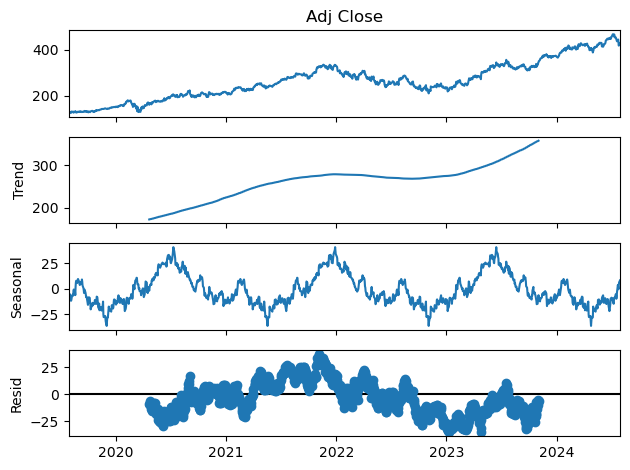

In [20]:
decomposition.plot()
plt.show()

### Weekly

In [21]:
# decompose the time series
decomposition = tsa.seasonal_decompose(weekly_msft_df, model='additive')

In [22]:
# add the decomposition data

weekly_msft_df["Trend"] = decomposition.trend
weekly_msft_df["Seasonal"] = decomposition.seasonal
weekly_msft_df["Residual"] = decomposition.resid

weekly_msft_df.head(10)

,Adj Close,Trend,Seasonal,Residual
Date,,,,
2019-08-04,132.107831,NaN,8.514039,NaN
2019-08-11,129.469920,NaN,10.922556,NaN
2019-08-18,129.611943,NaN,8.380757,NaN
2019-08-25,131.211960,NaN,10.338836,NaN
2019-09-01,130.656970,NaN,10.071513,NaN
2019-09-08,132.244408,NaN,7.059110,NaN
2019-09-15,131.007196,NaN,1.401180,NaN
2019-09-22,132.574548,NaN,-0.486337,NaN
2019-09-29,132.651086,NaN,-8.595928,NaN


In [23]:
cols = ["Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=weekly_msft_df.index, y=weekly_msft_df[col]),
        row=i+1,
        col=1
    )

fig.update_layout(height=800, width=1200, showlegend=False)
fig.show()

**Plot Description:**

Seasonal fluctuations are consistent despite seeing an overall upward trend in the stock closing price and so an `additive` model is appropriate in this case.

**Key Insights:**

- **Trend:** Clear upward trend, with a dip in stock performance between 2022 and 2023.

- **Seasonality:** Seasonal plot shows peaks between July and August and drops every March and October. Potential recurring market conditions or specific events which affect the stock price, to be investigated.

- **Residiuals:** Peak at + 30 and -30 indicating some underlying pattern not detected by trend or seasonality. These peaks do look as if they are random but it looks like there was an unexpected events which meant the stock performance differs from the norm at the end of 2021 and start of 2023. 

### Monthly

In [24]:
# decompose the time series
decomposition = tsa.seasonal_decompose(monthly_msft_df, model='additive')

In [25]:
# add the decomposition data

monthly_msft_df["Trend"] = decomposition.trend
monthly_msft_df["Seasonal"] = decomposition.seasonal
monthly_msft_df["Residual"] = decomposition.resid

monthly_msft_df.head(10)

,Adj Close,Trend,Seasonal,Residual
Date,,,,
2019-07-01,132.770340,NaN,8.649836,NaN
2019-08-01,130.317368,NaN,9.182483,NaN
2019-09-01,132.158781,NaN,-4.197095,NaN
2019-10-01,133.224382,NaN,-8.893039,NaN
2019-11-01,141.880220,NaN,4.337665,NaN
2019-12-01,148.031987,NaN,2.829375,NaN
2020-01-01,157.459983,154.381423,-3.344848,6.423408
2020-02-01,171.783896,160.381278,1.224525,10.178094
2020-03-01,146.871440,166.496377,-9.291678,-10.333259


In [26]:
cols = ["Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=monthly_msft_df.index, y=monthly_msft_df[col]),
        row=i+1,
        col=1
    )

fig.update_layout(height=800, width=1200, showlegend=False)
fig.show()

**Plot Description:**

Seasonal fluctuations are consistent despite seeing an overall upward trend in the stock closing price and so an `additive` model is appropriate in this case.

**Key Insights:**

- **Trend:** Clear upward trend, with a dip in stock performance between 2022 and 2023.

- **Seasonality:** Seasonal plot shows peaks every August and drops every March and October. Potential recurring market conditions or specific events which affect the stock price, to be investigated.

- **Residiuals:** Peak at + 30 and -30 indicating some underlying pattern not detected by trend or seasonality. These peaks do look as if they are random but it looks like there was an unexpected events which meant the stock performance differs from the norm at the end of 2021 and start of 2023. 


### Aggregation Choice : Weekly

Choosing to aggregate the data on a weekly level compared to montly as it captures more granularity in the data and so can identify patterns which may be missed by monthly aggregated data.

Daily data has proven to be challenging due to the decision not to interpolate missing data. These missing dates correspond to non-trading days (weekends and public holidays). To interpolate data on these days might lead to inaccurate results and insights since there is no actual trading activity. Therefore, I will continue with weekly aggregation but may revisit this approach if further adjustments are needed as the project progresses.

## Conclusion
----

TODOs

- intro/conc
- discuss choice to use adj_close instead of close 
- how you will start with univariate timeseries and revisit the other columns later when do feaature engineering
- checking of the code and comments
- format of graphs